In [1]:
%cd ..

/home/gergopool/work/uva/atcs/Language-Specific-Subnetworks


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np

from data import ALLOWED_LANGUAGES

%matplotlib inline

In [3]:
def plot_stitching(df, s, title, y_label):

    layers = np.arange(12) + 1

    subdf = df.groupby([f'front_{s}', f'end_{s}','layer'])['sim'].mean().reset_index().copy()
    subdf['y_tick'] = subdf[f'front_{s}'] + '→' + subdf[f'end_{s}']
    subdf.drop([f'front_{s}', f'end_{s}'], axis=1, inplace=True)
    subdf.groupby(['y_tick', 'layer'])

    y_ticks = subdf.y_tick.drop_duplicates()

    results = np.zeros((len(y_ticks), 12))
    for i, y_tick in enumerate(y_ticks):
        x = subdf[(subdf.y_tick==y_tick)].sort_values('layer')[['layer','sim']].values
        for l, sim in x:
            results[i, int(l)] = sim
        # results[i] = x

    fig = plt.figure(figsize=(8,len(y_ticks)//3))
    ax = sns.heatmap(results, annot=True)
    plt.title(title)
    plt.yticks(np.arange(len(y_ticks))+0.5, y_ticks, rotation=0)
    plt.xticks(layers-0.5, layers)
    plt.xlabel("Layers")
    plt.ylabel(y_label, rotation=-90, labelpad=15)
    ax.yaxis.set_label_position("right")


## Across seeds

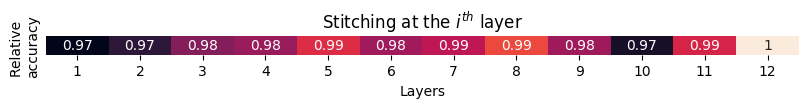

In [4]:
def plot_per_layer(df):

    layers = np.arange(12) + 1
    results = np.zeros((1,12))
    
    for layer in range(12):
        results[0, layer] = df[df.layer==layer].sim.mean()

    fig = plt.figure(figsize=(8,1))
    ax = sns.heatmap(results, annot=True, cbar=False)
    plt.title("Stitching at the $i^{th}$ layer")
    plt.yticks([], [])
    plt.xticks(layers-0.5, layers)
    plt.xlabel("Layers")
    plt.ylabel('Relative \naccuracy')

df = pd.read_csv('results/stitch/stitch_across_seeds.csv')
df = df[df.end_model == df.dataset]
df['sim'] = df.stitch_acc / df.baseline_acc
plot_per_layer(df)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('results/plots/stitch_seeds.pdf')

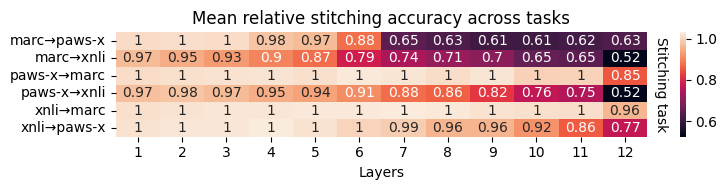

In [5]:
df = pd.read_csv('results/stitch/stitch_across_tasks.csv')
df = df[df.end_model == df.dataset]
df['sim'] = df.stitch_acc / df.baseline_acc
df.head()
os.makedirs('results/plots', exist_ok=True)
plot_stitching(df, "model", "Mean relative stitching accuracy across tasks", "Stitching task")
plt.tight_layout()
plt.savefig('results/plots/stitch_tasks.pdf')

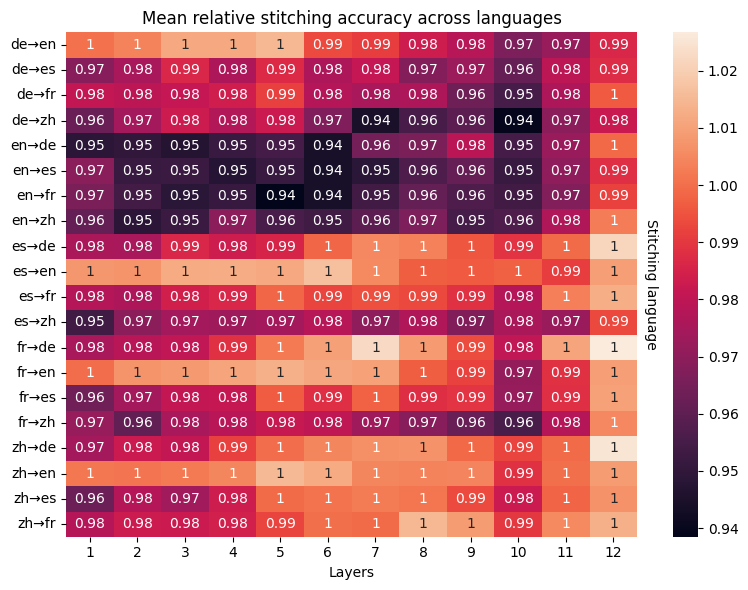

In [6]:
df = pd.read_csv('results/stitch/stitch_across_languages.csv')
df = df[df.end_model == df.dataset]
df['sim'] = df.stitch_acc / df.baseline_acc
plot_stitching(df, "lang", "Mean relative stitching accuracy across languages", "Stitching language")
plt.tight_layout()
plt.savefig('results/plots/stitch_languages.pdf')

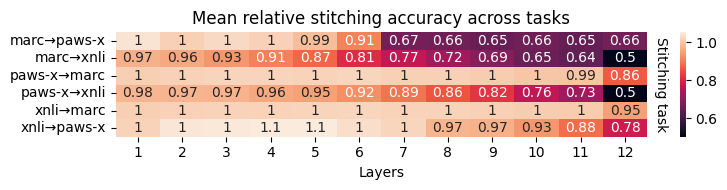

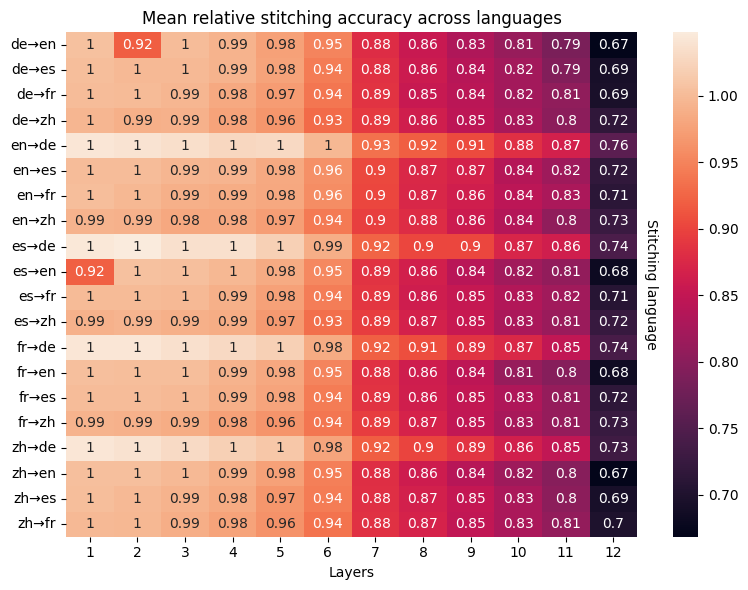

In [7]:
df = pd.read_csv('results/stitch/stitch_chaotic.csv')
df = df[df.end_model == df.dataset]
df['sim'] = df.stitch_acc / df.baseline_acc
df.head()

plot_stitching(df, "model", "Mean relative stitching accuracy across tasks", "Stitching task")
plt.tight_layout()
plt.savefig('results/plots/stitch_chaotic_tasks.pdf')
plot_stitching(df, "lang", "Mean relative stitching accuracy across languages", "Stitching language")
plt.tight_layout()
plt.savefig('results/plots/stitch_chaotic_languages.pdf')

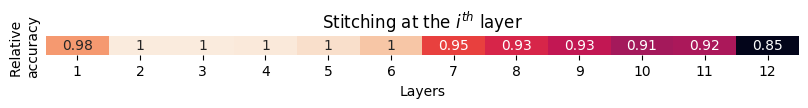

In [8]:
df = pd.read_csv('results/stitch/stitch_randomly.csv')
df = df[df.end_model == df.dataset]
df['sim'] = df.stitch_acc / df.baseline_acc
plot_per_layer(df)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('results/plots/stitch_randomly.pdf')